In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data = pd.read_csv(url, header=None, names=column_names, na_values=" ?", skipinitialspace=True)

In [4]:
# 填充缺失值
data = data.fillna(data.mode().iloc[0])

In [5]:
# 编码分类变量
le = LabelEncoder()
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [6]:
X = data.drop('income', axis=1).values
y = data['income'].values

In [7]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 导入自己实现的决策树
from DT import DecisionTree

In [9]:
# 构建决策树并学习
dt = DecisionTree()
dt.fit(X_train, y_train)

In [11]:
# 检验分类准确率
ypred = dt.predict(X_test)
print(f'准确率：{accuracy_score(ypred,y_test)*100:.2f}%')

准确率：84.32%


In [ ]:
class RandomForest:
    def __init__(self, n_estimators=100, max_features='sqrt',random_state=42):
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        # 可以尝试使用并发手段优化效率
        for _ in range(self.n_estimators):
            # 使用bootstrap采样生成训练集
            bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y[bootstrap_indices]

            if self.max_features=='log':
                fsize = int(np.log(n_features))+1
            else:
                fsize = int(np.sqrt(n_features))+1
            # 随机选择特征子集
            feature_indices = np.random.choice(n_features, size=fsize, replace=False)
            X_bootstrap = X_bootstrap[:, feature_indices]

            # 训练一棵决策树
            tree = DecisionTree()
            tree.fit(X_bootstrap, y_bootstrap)

            # 将特征索引传给树
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X[:, tree.feature_indices]) for tree in self.trees])
        return np.array([np.bincount(tree_predictions[:, i]).argmax() for i in range(X.shape[0])])

    def plot_accuracy_curve(self, X_test, y_test):
        accuracies = []
        tree_counts = np.arange(self.n_estimators) + 1
        
        # 计算每个树数量下的准确率
        for n_trees in tree_counts:
            # 累加前 n_trees 棵树的预测结果
            tree_preds = np.zeros((n_trees, X_test.shape[0]))
            for i in range(n_trees):
                tree, features = self.trees[i]
                tree_preds[i] = tree.predict(X_test[:, features])
            
            # 对每个样本进行多数投票
            majority_votes = np.array([np.bincount(tree_preds[:, i].astype(int)).argmax() for i in range(X_test.shape[0])])
            
            # 计算当前数量树的准确率
            accuracy = accuracy_score(y_test, majority_votes)
            accuracies.append(accuracy)
        
        # 绘制准确率曲线
        plt.figure(figsize=(10, 6))
        plt.plot(tree_counts, accuracies, marker='o', linestyle='-', color='b', label='Random Forest Accuracy')
        plt.grid(True)
        plt.show()

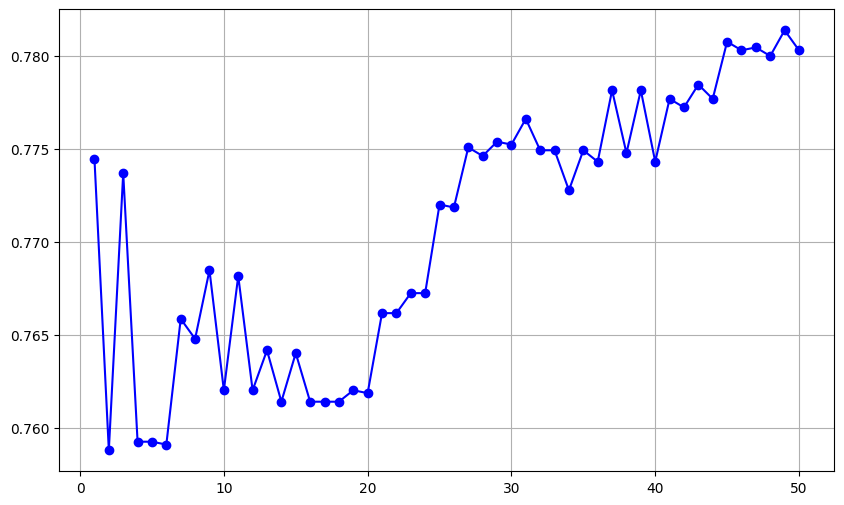

In [13]:
rf = RandomForest(n_estimators=50,max_features='sqrt')
rf.fit(X_train, y_train)
rf.plot_accuracy_curve(X_test, y_test)

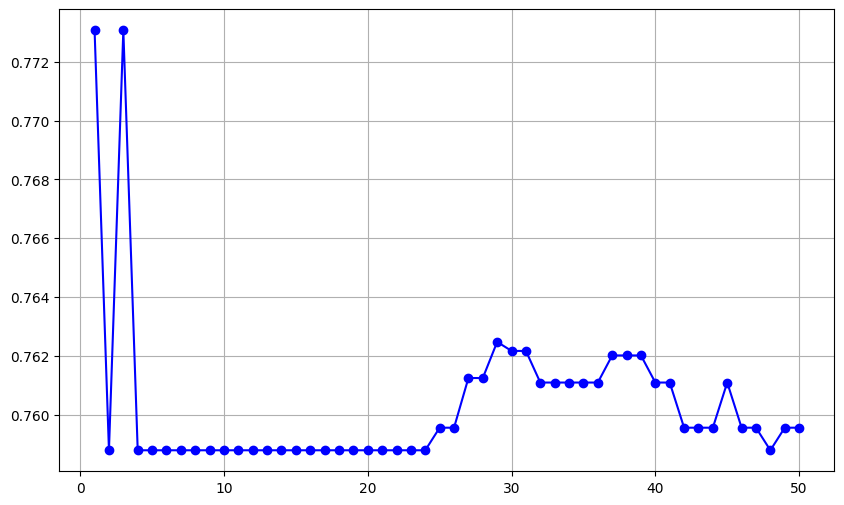

In [14]:
rf = RandomForest(n_estimators=50,max_features='log')
rf.fit(X_train, y_train)
rf.plot_accuracy_curve(X_test, y_test)

## 用sklearn的决策树检查集成学习部分代码是否正常

In [15]:
from sklearn.tree import DecisionTreeClassifier
class RandomForest:
    def __init__(self, n_estimators=100, max_features='sqrt',random_state=42):
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        # 可以尝试使用并发手段优化效率
        for _ in range(self.n_estimators):
            # 使用bootstrap采样生成训练集
            bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y[bootstrap_indices]

            if self.max_features=='log':
                fsize = int(np.log(n_features))+1
            else:
                fsize = int(np.sqrt(n_features))+1
            # 随机选择特征子集
            feature_indices = np.random.choice(n_features, size=fsize, replace=False)
            X_bootstrap = X_bootstrap[:, feature_indices]

            # 训练一棵决策树
            ######################################################################################
            tree = DecisionTreeClassifier()
            ######################################################################################
            tree.fit(X_bootstrap, y_bootstrap)

            # 将特征索引传给树
            self.trees.append((tree, feature_indices))

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X[:, tree.feature_indices]) for tree in self.trees])
        return np.array([np.bincount(tree_predictions[:, i]).argmax() for i in range(X.shape[0])])

    def plot_accuracy_curve(self, X_test, y_test):
        accuracies = []
        tree_counts = np.arange(self.n_estimators) + 1
        
        # 计算每个树数量下的准确率
        for n_trees in tree_counts:
            # 累加前 n_trees 棵树的预测结果
            tree_preds = np.zeros((n_trees, X_test.shape[0]))
            for i in range(n_trees):
                tree, features = self.trees[i]
                tree_preds[i] = tree.predict(X_test[:, features])
            
            # 对每个样本进行多数投票
            majority_votes = np.array([np.bincount(tree_preds[:, i].astype(int)).argmax() for i in range(X_test.shape[0])])
            
            # 计算当前数量树的准确率
            accuracy = accuracy_score(y_test, majority_votes)
            accuracies.append(accuracy)
        
        # 绘制准确率曲线
        plt.figure(figsize=(10, 6))
        plt.plot(tree_counts, accuracies, marker='o', linestyle='-', color='b', label='Random Forest Accuracy')
        plt.grid(True)
        plt.show()

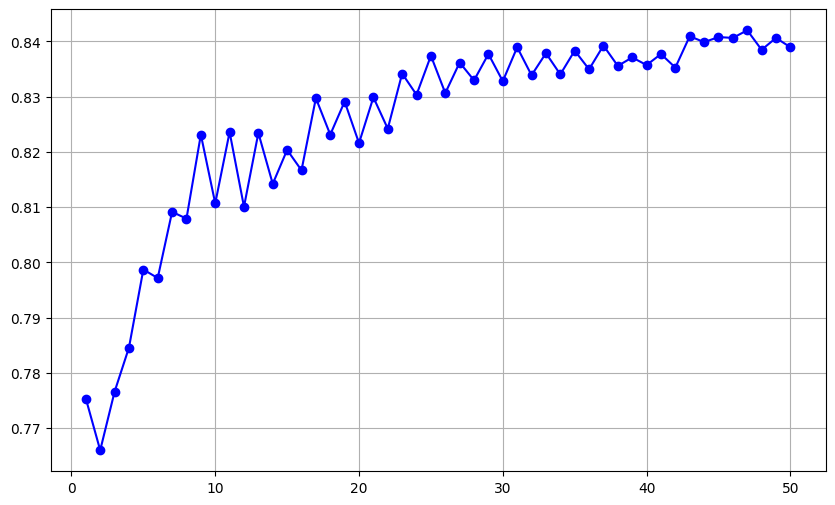

In [16]:
rf = RandomForest(n_estimators=50,max_features='sqrt')
rf.fit(X_train, y_train)
rf.plot_accuracy_curve(X_test, y_test)

### 自己实现的随机森林效果不好的原因可能出在决策树中，可以尝试继续优化